In [2]:
import torch
import torch.nn as nn
from torch import tensor
import numpy as np
import sys
import matplotlib.pyplot as plt
import torch
from IPython import display
import pylab as pl
import seaborn as sns
from torch import nn
import torch.optim as optim
import sys
torch.set_default_tensor_type(torch.FloatTensor)

In [3]:
class VectorQuantization(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VectorQuantization, self).__init__()
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(num_embeddings, embedding_dim)
        self.embedding.weight.data.uniform_(-1, 1)  # Inicialización de los embeddings

    def forward(self, x):
        # Redimensionar la entrada para que sea 2D (batch_size, seq_len)
        x = x.view(-1, self.embedding_dim)
        
        # Encontrar el índice más cercano en el diccionario de embeddings
        dist = torch.cdist(x.unsqueeze(0), self.embedding.weight.unsqueeze(0))
        indices = torch.argmin(dist, dim=-1)
        quantized = self.embedding(indices)
        
        # Reshape de vuelta a la forma original
        quantized = quantized.view(x.size())

        return quantized, indices


class VQVAE(nn.Module):
    def __init__(self, num_embeddings, embedding_dim):
        super(VQVAE, self).__init__()
        entrada = 1
        salida = 1
        hidden_size = 2
        self.encoder = nn.Sequential(
            #nn.Sigmoid(),
        )
        self.vq = VectorQuantization(num_embeddings, embedding_dim)
        self.decoder = nn.Sequential(
            #nn.Linear(embedding_dim, hidden_size),
            #nn.Linear(hidden_size, salida)
            #nn.LeakyReLU(),
            #nn.Linear(embedding_dim, salida),
            #nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        quantized, indices = self.vq(x)
        x_recon = self.decoder(quantized)
        return x_recon, quantized, indices



In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
size = 250

# Hiperparámetros
embedding_dim = 1
num_embeddings = 100
batch_size = 1
learning_rate = 0.01
num_epochs = 10
data = torch.rand(1, size).T


In [5]:
model = VQVAE(num_embeddings=num_embeddings, embedding_dim=embedding_dim)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Ciclo de entrenamiento
for epoch in range(num_epochs):
    total_loss = 0
    for inputs in data:
        outputs, quantized, indices = model(inputs)
        loss = criterion(outputs[0], inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # Imprimir la pérdida promedio para este epoch
    avg_loss = total_loss / len(data)
    #print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}')
# Evaluar el modelo (en este caso, comprobar si memorizó los datos)




tensor([-0.0806], grad_fn=<EmbeddingBackward0>)


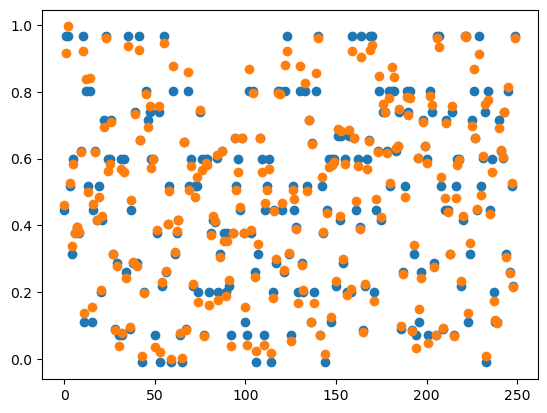

In [15]:
x = np.arange(0,size,1)
outputs, quantized, indices = model(data)
indices = tensor([[1,1,1,1]])
print(model.vq.embedding(indices[0]))
plt.scatter(x,outputs.T[0].detach().numpy())
plt.scatter(x,data.T[0])
plt.savefig("asd.png")